In [51]:
import numpy as np
import skimage as sk
import skimage.io as skio
import skimage.color as skcolor
from scipy import signal
import cv2
import math
import matplotlib.pyplot as plt
import skimage.transform as sktr

# 1.1: Finite Difference Operator

In [52]:
# taking input image
imname = 'cameraman.png'
im = skio.imread(imname)
if im.shape[2] == 4:  # Check if the image has an alpha channel
    im_rgb = im[:, :, :3]  # Discard the alpha channel
else:
    im_rgb = im

# Convert RGB to grayscale
im_gray = skcolor.rgb2gray(im_rgb)

In [53]:
dx = np.array([1, -1]).reshape(1, 2) 
dy = np.array([1, -1]).reshape(2, 1)

In [54]:
# convolve the image with finite difference operators D_x and D_y
xgrad = signal.convolve2d(im_gray, dx, boundary='symm', mode='same')
ygrad = signal.convolve2d(im_gray, dy, boundary='symm', mode='same')
fname = 'xgrad.jpg'
skio.imsave(fname, xgrad)


Lossy conversion from float64 to uint8. Range [-0.8235294117647058, 0.9058823529411765]. Convert image to uint8 prior to saving to suppress this warning.


In [55]:
fname = 'ygrad.jpg'
skio.imsave(fname, ygrad)

Lossy conversion from float64 to uint8. Range [-0.6823529411764706, 0.9529411764705882]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


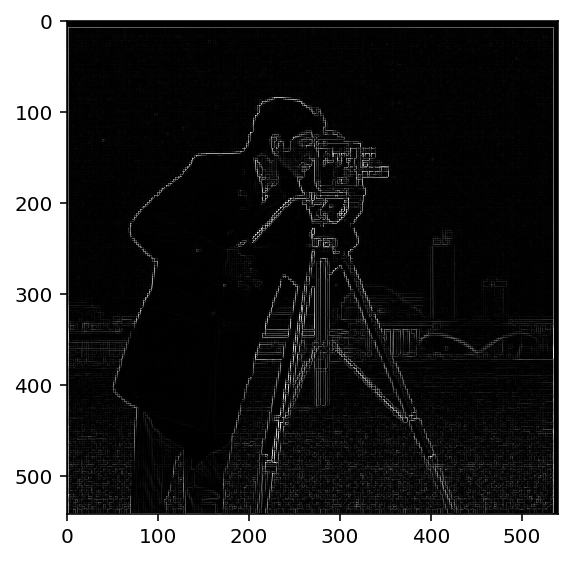

In [56]:
# compute and show the gradient magnitude image
gradient =  np.sqrt(xgrad ** 2 + ygrad ** 2)
normalized_gradient = (gradient - np.min(gradient)) / (np.max(gradient) - np.min(gradient))

fname = 'gradient.jpg'
skio.imsave(fname, normalized_gradient)
skio.imshow(normalized_gradient, cmap="gray")

/var/folders/j3/z61mchl94r7_0hyhm9425phm0000gn/T/ipykernel_77999/1691337882.py:5: UserWarning: edge.jpg is a low contrast image
  skio.imsave(fname, edge)
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


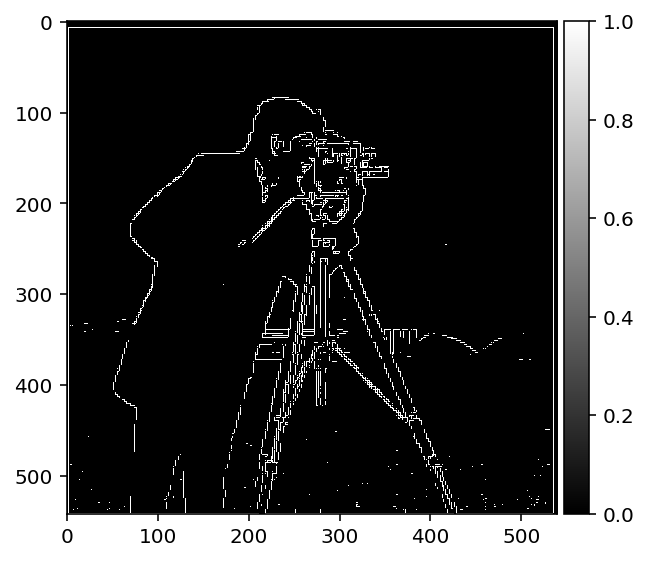

In [57]:
# turn into edge image
threshold = 0.25
edge = np.where(gradient > threshold, 1, 0)  
fname = 'edge.jpg'
skio.imsave(fname, edge)
skio.imshow(edge, cmap="gray")


# Part 1.2: Derivative of Gaussian (DoG) Filter

### Approach 1: Blurring the Image First

In [202]:
gauss = cv2.getGaussianKernel(10, 2)

# outer product to create 2D Gaussian kernel
gauss2D = gauss @ gauss.T 
blurred = signal.convolve2d(im_gray, gauss2D, boundary='symm', mode='same')
fname = 'blur.jpg'
skio.imsave(fname, blurred)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [59]:
blurredxg = signal.convolve2d(blurred, dx, boundary='symm', mode='same')
fname = 'blurredxg.jpg'
skio.imsave(fname, blurredxg)

Lossy conversion from float64 to uint8. Range [-0.15147761464903764, 0.17818766386704943]. Convert image to uint8 prior to saving to suppress this warning.


In [60]:
blurredyg = signal.convolve2d(blurred, dy, boundary='symm', mode='same')
fname = 'blurredyg.jpg'
skio.imsave(fname, blurredyg)

Lossy conversion from float64 to uint8. Range [-0.15325619506657528, 0.13458883763701873]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


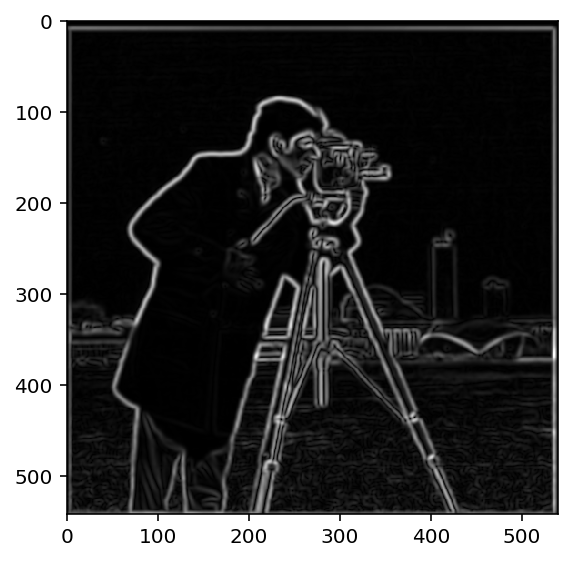

In [61]:
# blurred gradient magnitude
blur_grad =  np.sqrt(blurredxg ** 2 + blurredyg ** 2)
blurred_grad = (blur_grad - np.min(blur_grad)) / (np.max(blur_grad) - np.min(blur_grad))

fname = 'blurred_gradient.jpg'
skio.imsave(fname, blurred_grad)
skio.imshow(blurred_grad, cmap = "gray")

/var/folders/j3/z61mchl94r7_0hyhm9425phm0000gn/T/ipykernel_77999/2896917375.py:6: UserWarning: blur_edge.jpg is a low contrast image
  skio.imsave(fname, blur_edge)
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


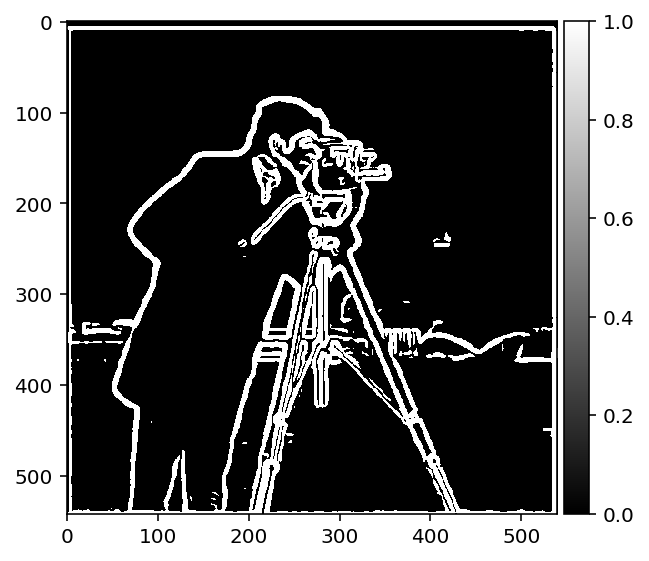

In [62]:
# blurred binarized magnitude

threshold = 0.2
blur_edge = np.where(blurred_grad > threshold, 1, 0)  
fname = 'blur_edge.jpg'
skio.imsave(fname, blur_edge)
skio.imshow(blur_edge, cmap="gray")

### Approach 2: Convolving the Gaussian Filter with the Partial Derivatives First

In [63]:
# # Convolve the gaussian with D_x and D_y 
dx_gauss = signal.convolve2d(gauss2D, dx, boundary='symm', mode='same')
dy_gauss = signal.convolve2d(gauss2D, dy, boundary='symm', mode='same')

fname = 'dx_gauss.jpg'
skio.imsave(fname, dx_gauss)
fname = 'dy_gauss.jpg'
skio.imsave(fname, dy_gauss)


/var/folders/j3/z61mchl94r7_0hyhm9425phm0000gn/T/ipykernel_77999/3251546378.py:6: UserWarning: dx_gauss.jpg is a low contrast image
  skio.imsave(fname, dx_gauss)
Lossy conversion from float64 to uint8. Range [-0.011799896267761276, 0.011799896267761276]. Convert image to uint8 prior to saving to suppress this warning.
/var/folders/j3/z61mchl94r7_0hyhm9425phm0000gn/T/ipykernel_77999/3251546378.py:8: UserWarning: dy_gauss.jpg is a low contrast image
  skio.imsave(fname, dy_gauss)
Lossy conversion from float64 to uint8. Range [-0.011799896267761276, 0.011799896267761276]. Convert image to uint8 prior to saving to suppress this warning.


In [64]:
# blurred gaussian dx convolved with original image
dx_gaussim = signal.convolve2d(im_gray, dx_gauss, boundary='symm', mode='same')
fname = 'dx_gaussim.jpg'
skio.imsave(fname, dx_gaussim)

# blurred gaussian dy convolved with original image
dy_gaussim = signal.convolve2d(im_gray, dy_gauss, boundary='symm', mode='same')
fname = 'dy_gaussim.jpg'
skio.imsave(fname, dy_gaussim)

# gradient magnitude 
blur_gauss =  np.sqrt(blurredxg ** 2 + blurredyg ** 2)
blurred_gauss = (blur_gauss - np.min(blur_gauss)) / (np.max(blur_gauss) - np.min(blur_gauss))
fname = 'blurred_gauss.jpg'
skio.imsave(fname, blurred_gauss)

# edge magnitude 
threshold = 0.2
blur_edge2 = np.where(blurred_gauss > threshold, 1, 0)  
fname = 'blur_edge2.jpg'
skio.imsave(fname, blur_edge)

Lossy conversion from float64 to uint8. Range [-0.13823924967479354, 0.16428286485508922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.1397296555823034, 0.124549563299786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/var/folders/j3/z61mchl94r7_0hyhm9425phm0000gn/T/ipykernel_77999/2039987015.py:21: UserWarning: blur_edge2.jpg is a low contrast image
  skio.imsave(fname, blur_edge)
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


# Part 2.1: Image "Sharpening"

In [65]:
# on the tajmahal image:
im = 'taj.jpg'
taj = skio.imread(im)

In [66]:
# filter for convolving gaussian on one color channel:
def blur(channel, kernel = 5, sigma = 1):
    gauss = cv2.getGaussianKernel(kernel, sigma)
    gauss2D = gauss @ gauss.T 
    blurred = signal.convolve2d(channel, gauss2D, boundary='symm', mode='same')
    return blurred

def sharpen(channel, alpha):
    details = channel - blur(channel)
    sharpened = channel + (alpha * details)
    return np.clip(sharpened, 0, 255) 


In [67]:
def sharpen_img(img, alpha = 1):
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]

    r_sharpened = sharpen(r, 1.5)
    g_sharpened = sharpen(g, 1.5)
    b_sharpened = sharpen(b, 1.5)

    sharp = np.dstack((r_sharpened, g_sharpened, b_sharpened))
    return sharp

fname = f'taj_sharp.jpg'
skio.imsave(fname, sharpen_img(taj, 1.5))

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [-123.64819163321641, 92.4430923478419]. Convert image to uint8 prior to saving to suppress this warning.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


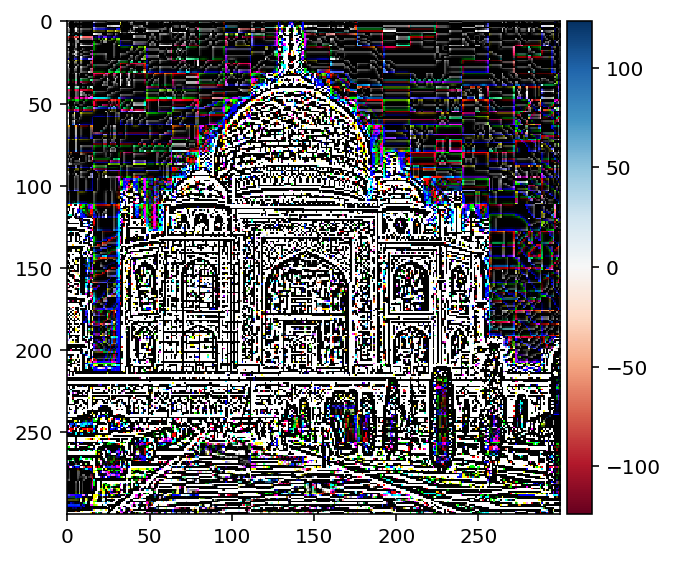

In [68]:
r = taj[:, :, 0]
g = taj[:, :, 1]
b = taj[:, :, 2]

r_blurred = blur(r)
g_blurred = blur(g)
b_blurred = blur(b)

# combine the blurred channels
blurred_taj = np.dstack((r_blurred, g_blurred, b_blurred))

# save the high-frequency details
details = taj - blurred_taj
fname = 'details.jpg'
skio.imsave(fname, details)
skio.imshow(details)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
/Users/camilledang/opt/anaconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


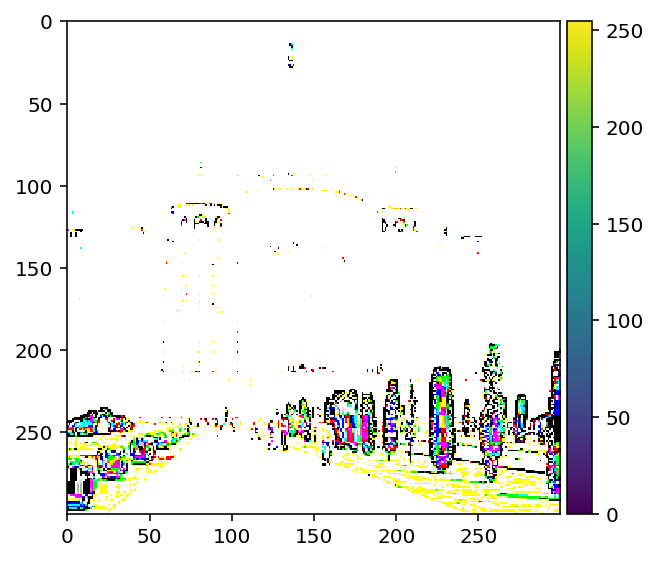

In [69]:
alpha = 1.5
sharpened = taj + (alpha * details)
sharpened = np.clip(sharpened, 0, 255)
fname = 'sharpened.jpg'
skio.imsave(fname, sharpened)
skio.imshow(sharpened)

In [70]:
# sharpen on other images

im = 'cathedral.jpg'
cathedral = skio.imread(im)
cathedral_sharp = sharpen_img(cathedral, 1)
fname = 'cathedral_sharp.jpg'
skio.imsave(fname, cathedral_sharp)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [71]:
# sagrada

im = 'sag.jpg'
sag = skio.imread(im)

sag_r = blur(sag[:, :, 0])
sag_g = blur(sag[:, :, 1])
sag_b = blur(sag[:, :, 2])
blurred_sag = np.dstack((sag_r, sag_g, sag_b))
sag_details = sag - blurred_sag

fname = 'sag_blurred.jpg'
skio.imsave(fname, blurred_sag)
fname = 'sag_details.jpg'
skio.imsave(fname, sag_details)
sag_sharp = sharpen_img(sag, 0.75)
fname = 'sag_sharp.jpg'
skio.imsave(fname, sag_sharp)

Lossy conversion from float64 to uint8. Range [0.639399766125972, 254.1659710230031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-137.4076758136411, 159.41743818396498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [73]:
# trees

im = 'trees.jpg'
trees = skio.imread(im)

trees_r = blur(trees[:, :, 0])
trees_g = blur(trees[:, :, 1])
trees_b = blur(trees[:, :, 2])
blurred_trees = np.dstack((trees_r, trees_g, trees_b))
trees_details = trees - blurred_trees

fname = 'trees_blurred.jpg'
skio.imsave(fname, blurred_trees)
fname = 'trees_details.jpg'
skio.imsave(fname, trees_details)

trees_sharp = sharpen_img(trees, 1)
fname = 'trees_sharp.jpg'
skio.imsave(fname, trees_sharp)

Lossy conversion from float64 to uint8. Range [0.36196543477873616, 253.0758021307168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-85.12289609641638, 123.91022956946856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [74]:
# scenery

im = 'scenery.jpg'
scenery = skio.imread(im)

scenery_r = blur(scenery[:, :, 0])
scenery_g = blur(scenery[:, :, 1])
scenery_b = blur(scenery[:, :, 2])
blurred_scenery = np.dstack((scenery_r, scenery_g, scenery_b))
scenery_details = scenery - blurred_scenery

fname = 'scenery_blurred.jpg'
skio.imsave(fname, blurred_scenery)
fname = 'scenery_details.jpg'
skio.imsave(fname, scenery_details)

scenery_sharp = sharpen_img(scenery, 1)
fname = 'scenery_sharp.jpg'
skio.imsave(fname, scenery_sharp)

Lossy conversion from float64 to uint8. Range [0.0, 255.00000000000003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-80.29880089550342, 91.6106508042758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


# Part 2.2: Hybrid Images

In [75]:
# load images

derek = skio.imread('hybrid_python 2/DerekPicture.jpg')/255
nutmeg = skio.imread('hybrid_python 2/nutmeg.jpg')/255

In [76]:
def get_points(im1, im2):
    plt.switch_backend("qtagg")
    print('Please select 2 points in each image for alignment.')
    plt.imshow(im1)
    p1, p2 = plt.ginput(2)
    plt.close()
    plt.imshow(im2)
    p3, p4 = plt.ginput(2)
    plt.close()
    return (p1, p2, p3, p4)

def recenter(im, r, c):
    R, C, _ = im.shape
    rpad = (int) (np.abs(2*r+1 - R))
    cpad = (int) (np.abs(2*c+1 - C))
    return np.pad(
        im, [(0 if r > (R-1)/2 else rpad, 0 if r < (R-1)/2 else rpad),
             (0 if c > (C-1)/2 else cpad, 0 if c < (C-1)/2 else cpad),
             (0, 0)], 'constant')

def find_centers(p1, p2):
    cx = np.round(np.mean([p1[0], p2[0]]))
    cy = np.round(np.mean([p1[1], p2[1]]))
    return cx, cy

def align_image_centers(im1, im2, pts):
    p1, p2, p3, p4 = pts
    h1, w1, b1 = im1.shape
    h2, w2, b2 = im2.shape
    
    cx1, cy1 = find_centers(p1, p2)
    cx2, cy2 = find_centers(p3, p4)

    im1 = recenter(im1, cy1, cx1)
    im2 = recenter(im2, cy2, cx2)
    return im1, im2

def rescale_images(im1, im2, pts):
    p1, p2, p3, p4 = pts
    len1 = np.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
    len2 = np.sqrt((p4[1] - p3[1])**2 + (p4[0] - p3[0])**2)
    dscale = len2/len1
    if dscale < 1:
        im1 = sktr.rescale(im1, (dscale, dscale, 1)) # should be same as passing multichannel=True
    else:
        im2 = sktr.rescale(im2, (1./dscale, 1./dscale, 1))
    return im1, im2

def rotate_im1(im1, im2, pts):
    p1, p2, p3, p4 = pts
    theta1 = math.atan2(-(p2[1] - p1[1]), (p2[0] - p1[0]))
    theta2 = math.atan2(-(p4[1] - p3[1]), (p4[0] - p3[0]))
    dtheta = theta2 - theta1
    im1 = sktr.rotate(im1, dtheta*180/np.pi)
    return im1, dtheta

def match_img_size(im1, im2):
    # Make images the same size
    h1, w1, c1 = im1.shape
    h2, w2, c2 = im2.shape
    if h1 < h2:
        im2 = im2[int(np.floor((h2-h1)/2.)) : -int(np.ceil((h2-h1)/2.)), :, :]
    elif h1 > h2:
        im1 = im1[int(np.floor((h1-h2)/2.)) : -int(np.ceil((h1-h2)/2.)), :, :]
    if w1 < w2:
        im2 = im2[:, int(np.floor((w2-w1)/2.)) : -int(np.ceil((w2-w1)/2.)), :]
    elif w1 > w2:
        im1 = im1[:, int(np.floor((w1-w2)/2.)) : -int(np.ceil((w1-w2)/2.)), :]
    assert im1.shape == im2.shape
    return im1, im2

def align_images(im1, im2):
    pts = get_points(im1, im2)
    im1, im2 = align_image_centers(im1, im2, pts)
    im1, im2 = rescale_images(im1, im2, pts)
    im1, angle = rotate_im1(im1, im2, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2

if __name__ == "__main__":
    # 1. load the image
    # 2. match image size by calling match_img_size
    # 3. align the two images by calling align_images
    # Now you are ready to write your own code for creating hybrid images!
    pass


In [77]:
nutmeg_aligned, derek_aligned = align_images(nutmeg, derek)

fname = 'derek_aligned.jpg'

skio.imsave(fname, derek_aligned)
fname = 'nutmeg_aligned.jpg'
skio.imsave(fname, nutmeg_aligned)

Please select 2 points in each image for alignment.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


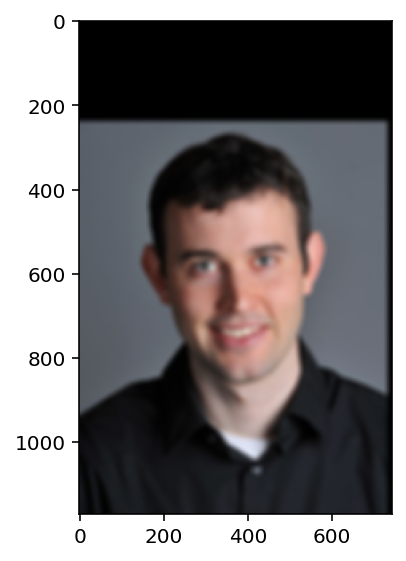

In [78]:
# low pass one image
def low_pass(im, kernel = 22, sigma = 7):
    blurred_r = blur(im[:, :, 0], kernel, sigma)
    blurred_g = blur(im[:, :, 1], kernel, sigma)
    blurred_b = blur(im[:, :, 2], kernel, sigma)
    return np.dstack((blurred_r, blurred_g, blurred_b))

derek_low = low_pass(derek_aligned)
fname = 'derek_low.jpg'
skio.imsave(fname, derek_low)
skio.imshow(derek_low)

Lossy conversion from float64 to uint8. Range [-0.6187579502308931, 0.6491369240872047]. Convert image to uint8 prior to saving to suppress this warning.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


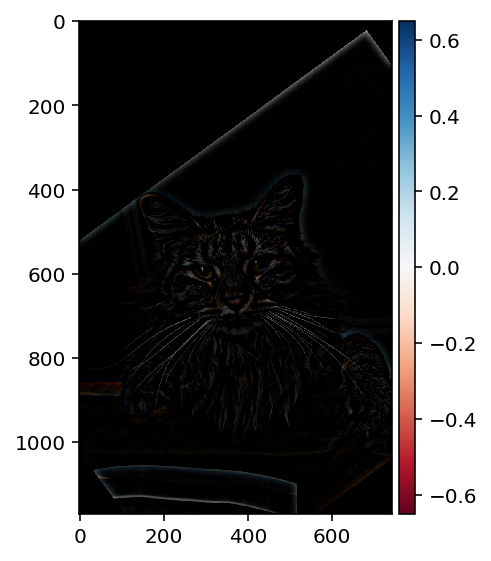

In [134]:
# high pass
def high_pass(im, kernel = 49, sigma = 10):
    return im - low_pass(im, kernel, sigma)

nutmeg_high = high_pass(nutmeg_aligned)
fname = 'nutmeg_high.jpg'
skio.imsave(fname, nutmeg_high)
skio.imshow(nutmeg_high)

Lossy conversion from float64 to uint8. Range [-0.6187579502308931, 1.3401964714465142]. Convert image to uint8 prior to saving to suppress this warning.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


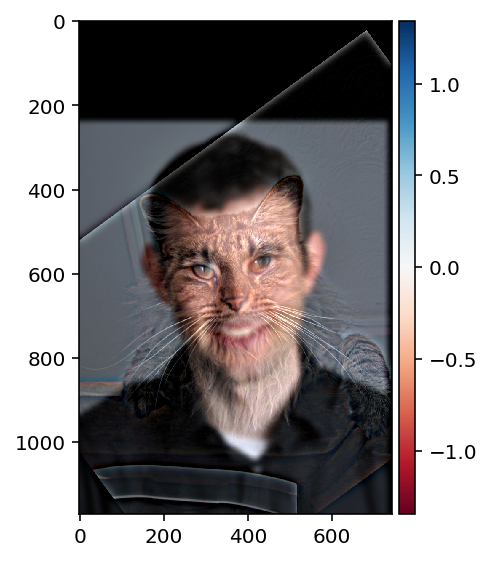

In [135]:
catman = nutmeg_high + derek_low
fname = 'catman.jpg'
skio.imsave(fname, catman)
skio.imshow(catman)

In [184]:
# brother

connor1 = skio.imread('connor1.jpg')/255
connor2 = skio.imread('connor2.jpg')/255

conalign1, conalign2 = align_images(connor1, connor2)

connor_low = low_pass(conalign1)
connor_high = high_pass(conalign2)

skio.imsave('connor_low.jpg', connor_low)
skio.imsave('connor_high.jpg', connor_high)

connor_comb = connor_low + connor_high
fname = 'connor_comb.jpg'
skio.imsave(fname, connor_comb)

Please select 2 points in each image for alignment.


Lossy conversion from float64 to uint8. Range [0.09994923624149214, 1.0000000000000007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.42111971460716946, 0.3926131825315454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.10292028850497642, 1.237483217880568]. Convert image to uint8 prior to saving to suppress this warning.


In [185]:
# brother selfies pt 2 (failure!)

connor3 = skio.imread('connor3.jpg')/255

conalign1, conalign3 = align_images(connor1, connor3)

fail_low = low_pass(conalign1)
fail_high = high_pass(conalign3)

skio.imsave('fail_low.jpg', fail_low)
skio.imsave('fail_high.jpg', fail_high)

fail = fail_low + fail_high
fname = 'fail.jpg'
skio.imsave(fname, fail)

Please select 2 points in each image for alignment.


Lossy conversion from float64 to uint8. Range [0.10007063583430627, 1.0000000000000007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.4796908833134443, 0.6096758021409034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.14611081383339575, 1.4556682904749]. Convert image to uint8 prior to saving to suppress this warning.


In [158]:
# tom cruise buckteeth

cruise = (skio.imread('cruise.jpg')/255)[:,:,:3]
buckteeth = (skio.imread('buckteeth.jpg')/255)[:,:,:3]

cruise, buckteeth = align_images(cruise, buckteeth)

cruise_low = low_pass(cruise, 22, 3)
buck_high = high_pass(buckteeth, 50, 20)

skio.imsave('cruise_low.jpg', cruise_low)
skio.imsave('buck_high.jpg', buck_high)

cruise_hybrid = cruise_low + buck_high
fname = 'cruise_hybrid.jpg'
skio.imsave(fname, cruise_hybrid, cmap = 'gray')

Please select 2 points in each image for alignment.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.29786457094555074, 0.39046287975230776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.1865365828152964, 1.3154401431883413]. Convert image to uint8 prior to saving to suppress this warning.


In [177]:
# tom cruise lion

croose = (skio.imread('cruise.jpg')/255)[:,:,:3]
lion = (skio.imread('lion.jpg')/255)[:,:,:3]

lion, croose = align_images(lion, croose)

croose_low = low_pass(croose, 22, 5)
lion_high = high_pass(lion, 30, 6)

skio.imsave('croose_low.jpg', croose_low)
skio.imsave('lion_high.jpg', lion_high)

croose_hybrid = croose_low + lion_high
fname = 'croose_hybrid.jpg'
skio.imsave(fname, croose_hybrid)

Please select 2 points in each image for alignment.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.5203855654436562, 0.5815485117258721]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.5186122891655209, 1.4396248801283318]. Convert image to uint8 prior to saving to suppress this warning.


In [174]:
# nuggets & eggrolls

nuggets = (skio.imread('nuggets.jpg')/255)[:,:,:3]
eggrolls = (skio.imread('eggrolls.jpg')/255)[:,:,:3]

nuggets, eggrolls = align_images(nuggets, eggrolls)

nuggets_low = low_pass(nuggets, 22, 7)
eggrolls_high = high_pass(eggrolls, 50, 13)

skio.imsave('nuggets_low.jpg', nuggets_low)
skio.imsave('eggrolls_high.jpg', eggrolls_high)

nugs_hybrid = nuggets_low + eggrolls_high

fname = 'nugs_hybrid.jpg'
skio.imsave(fname, nugs_hybrid)

Please select 2 points in each image for alignment.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.8281154755633783, 0.766808306918076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [182]:
# fourier transform of nuggets + eggrolls

fft_nuggets = sk.img_as_float(cv2.cvtColor(sk.img_as_ubyte(nuggets), cv2.COLOR_RGB2GRAY))
nuggets_fourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(fft_nuggets))))

fft_eggrolls = sk.img_as_float(cv2.cvtColor(sk.img_as_ubyte(eggrolls), cv2.COLOR_RGB2GRAY))
eggrolls_fourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(fft_eggrolls))))

fft_low = sk.img_as_float(cv2.cvtColor(sk.img_as_ubyte(nuggets_low), cv2.COLOR_RGB2GRAY))
low_fourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(fft_low))))

fft_high= sk.img_as_float(cv2.cvtColor(sk.img_as_ubyte(eggrolls_high), cv2.COLOR_RGB2GRAY))
high_fourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(fft_high))))

# normalize nugs_hybrid
nugs_hybrid_norm = (nugs_hybrid - np.min(nugs_hybrid)) / (np.max(nugs_hybrid) - np.min(nugs_hybrid))
fft_hybrid = sk.img_as_float(cv2.cvtColor(sk.img_as_ubyte(nugs_hybrid_norm), cv2.COLOR_RGB2GRAY))
hybrid_fourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(fft_hybrid))))

skio.imsave('nuggets_fourier.jpg', nuggets_fourier)
skio.imsave('eggrolls_fourier.jpg', eggrolls_fourier)
skio.imsave('low_fourier.jpg', low_fourier)
skio.imsave('high_fourier.jpg', high_fourier)
skio.imsave('hybrid_fourier.jpg', hybrid_fourier)

Lossy conversion from float64 to uint8. Range [-5.13657448486288, 12.938969697856816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-5.230828060598481, 13.238490314817879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-7.077554125979048, 12.938617559773437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-4.889890909968972, 10.59001640964152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-4.050929576736638, 13.112359180316087]. Convert image to uint8 prior to saving to suppress this warning.


# Part 2.3: Gaussian and Laplacian Stacks

In [186]:
# function to create gaussian and laplacian stacks

def stacks(im, levels = 7, kernel = 5, sigma = 1):
    gauss_stack = []
    laplacian_stack = []
    gauss_stack.append(im)
    for i in range(1, levels):
        gauss = cv2.getGaussianKernel(kernel, sigma)
        gauss2D = gauss @ gauss.T 
        r = gauss_stack[-1][:, :, 0]
        g = gauss_stack[-1][:, :, 1]
        b = gauss_stack[-1][:, :, 2]
        first = signal.convolve2d(r, gauss2D, boundary='symm', mode='same')
        second = signal.convolve2d(g, gauss2D, boundary='symm', mode='same')
        third = signal.convolve2d(b, gauss2D, boundary='symm', mode='same')
        first_diff = r - first
        second_diff = g - second
        third_diff = b - third
        next = np.dstack((first, second, third))
        diff_next = np.dstack((first_diff, second_diff, third_diff))
        gauss_stack.append(next)
        laplacian_stack.append(diff_next)
    laplacian_stack.append(gauss_stack[-1])
    return gauss_stack, laplacian_stack

# gaussian & laplacian stacks for apple image

apple = skio.imread('spline/apple.jpeg')
gauss_apple, laplacian_apple = stacks(apple, 5, 15, 3)

for i in range(len(gauss_apple)):
    skio.imsave(f'gauss_apple{i}.jpg', gauss_apple[i])

for i in range(len(laplacian_apple)):
    skio.imsave(f'laplacian_apple{i}.jpg', laplacian_apple[i])

Lossy conversion from float64 to uint8. Range [3.1844308476139487, 252.99244427114195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5.94901311829837, 252.31105116304428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [9.216646737843792, 251.8106373293578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [12.358767725721354, 251.32248117360274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-99.20633322325887, 75.68363894924781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-12.600347667207046, 23.162306711975617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-7.1268767719014505, 13.188708602448585

In [187]:
# gaussian & laplacian stacks for orange image

orange = skio.imread('spline/orange.jpeg')
gauss_orange, laplacian_orange = stacks(orange, 5, 15, 3)

for i in range(len(gauss_orange)):
    skio.imsave(f'gauss_orange{i}.jpg', gauss_orange[i])

for i in range(len(laplacian_orange)):
    skio.imsave(f'laplacian_orange{i}.jpg', laplacian_orange[i])

Lossy conversion from float64 to uint8. Range [0.9860796302025782, 251.77512637490017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.1643600819586015, 250.88200841666307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.3193422993806225, 250.60021154838438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.4659530778296486, 250.39968779649152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-39.35676123756704, 77.36104210217752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-13.809045868835739, 24.103123880047434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-8.7399233543521, 15.82630456462965

# Part 2.4: Multiresolution Blending (a.k.a. the oraple!)

In [194]:
# ORAPLE EXAMPLE

# oraple mask
mask = np.zeros(apple.shape)
mask[:, :mask.shape[1]//2] = 1
skio.imsave('mask.jpg', mask)

# blending images helper function
def blend_images(left, right, mask, levels = 7, kernel = 30, sigma = 5):
    blended = []
    left_mask = []
    right_mask = []
    _, laplacian_left = stacks(left, levels)
    _, laplacian_right = stacks(right, levels)
    gauss_mask, _ = stacks(mask, levels + 1, 50, 20)

    for i in range(levels):
        left_mask.append(laplacian_left[i] * gauss_mask[i + 1])
        right_mask.append(laplacian_right[i] * (1 - gauss_mask[i + 1]))
        blended_layer = (1 - gauss_mask[i + 1]) * laplacian_right[i] + gauss_mask[i + 1] * laplacian_left[i]
        blended.append(blended_layer)

    blend_final = blended[0]
    for i in range(1, levels):
        blend_final += blended[i]

    apple_final = left_mask[0]
    for i in range(1, levels):
        apple_final += left_mask[i]

    orange_final = right_mask[0]
    for i in range(1, levels):
        orange_final += right_mask[i]

    # normalizing the final image
    blend_final = (blend_final - np.min(blend_final)) / (np.max(blend_final) - np.min(blend_final))
    
    return blend_final, left_mask, right_mask

# results for oraple
blend_oraple, left_oraple, right_oraple = blend_images(apple, orange, mask)
skio.imsave('oraple_blend.jpg', blend_oraple)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [192]:
'''skio.imsave('final_apple.jpg', final_apple)
skio.imsave('final_orange.jpg', final_orange)'''

Lossy conversion from float64 to uint8. Range [-0.02753370077752848, 254.99940936666394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-4.912358507923116, 254.92432342749964]. Convert image to uint8 prior to saving to suppress this warning.


In [88]:
# 2.3: recreating the oraple 

for i in range(len(left_oraple)):
    skio.imsave(f'left_oraple{i}.jpg', left_oraple[i])

for i in range(len(right_oraple)):
    skio.imsave(f'right_oraple{i}.jpg', right_oraple[i])


Lossy conversion from float64 to uint8. Range [-38.28814919108024, 26.061790039313372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-17.916216477402045, 12.915804077854043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-10.948942916180371, 9.56141618202442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-7.556475864998093, 7.822016059557561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-5.554406896127518, 6.602402343515268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-4.288263099848198, 5.712667378207429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.621163315574691e-05, 250.29511852904

In [201]:
# pho + bun bo hue blending

pho = skio.imread('pho.jpg')/255
bun_aligned, pho_aligned = align_images(hue, pho)

pho_mask = np.zeros(pho_aligned.shape)
pho_mask[:pho_mask.shape[0]//2, :] = 1

blend_bunpho, left_bunpho, right_bunpho = blend_images(bun_aligned, pho_aligned, pho_mask)
skio.imsave('blend_bunpho.jpg', blend_bunpho)
skio.imsave('pho_mask.jpg', pho_mask)

Please select 2 points in each image for alignment.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [132]:
# kamala + coconut 

kamla = (skio.imread('kamla.jpg')/255)[:,:,:3]
cocoo = skio.imread('cocoo.jpg')/255
kamalaoutline = (skio.imread('kamalaoutline.jpg')/255)[:,:,:3]

(1005, 1197, 3) (1005, 1197, 3) (1005, 1197, 3)


In [133]:
blendcocos2, left_coco2, right_coco2 = blend_images(kamla, cocoo, kamalaoutline)
skio.imsave('blendcocos2.jpg', blendcocos2)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
